<a href="https://colab.research.google.com/github/sheepjun96/Hands_On-Maching-Learning/blob/main/2%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%98%EC%9D%8C%EB%B6%80%ED%84%B0_%EB%81%9D%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.5 데이터 다운로드

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# 2.3.6 데이터 구조 훑어보기

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


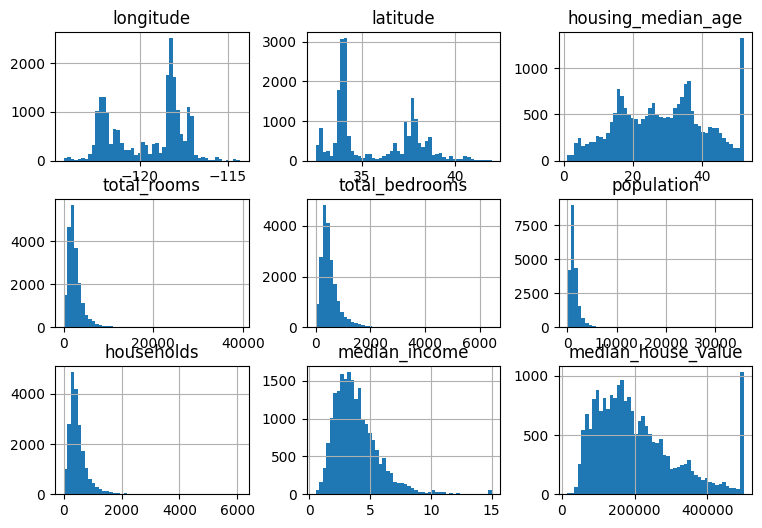

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(9,6))
plt.show()

# 2.3.7 테스트 세트 만들기

In [6]:
import numpy as np

In [7]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [9]:
len(train_set)

16512

In [10]:
len(test_set)

4128

프로그램을 다시 실행하면 다른 테스트 세트가 생성된다. 여러 번 계속하면 우리는 전체 데이터셋을 보는 것과 같다. 이런 문제를 해결하는 방법은 다음과 같다.

하나는 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것

또 다른 방법은 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것이다.


```
np.random.seed(42)
```



하지만 이 두 해법은 다음번에 업데이트된 데이터셋을 사용할 때 문제가 된다. 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 하려면 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것이다.

예를 들어 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보낼 수 있다. 이렇게 하면 여러 번 반복 실행하면서도 테스트 세트가 동일하게 유지된다.

새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않을 것이다.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

주택 데이터셋에는 식별자 컬럼이 없는데, 대신 행의 인덱스를 ID로 사용하면 해결된다.

In [12]:
housing_with_id = housing.reset_index()

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)



---


In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [15]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')
    # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


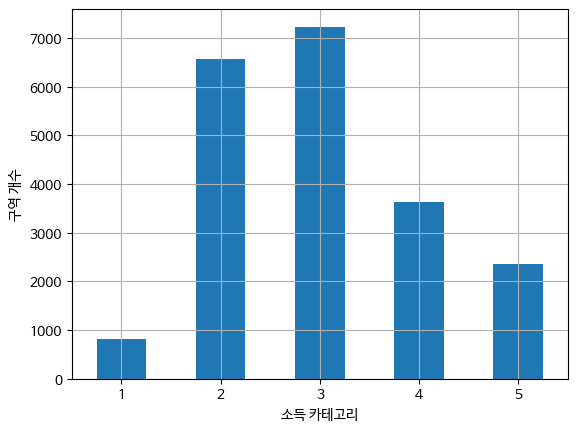

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

여러 개로 분할하면 모델의 성능을 더 잘 추정할 수 있다.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

첫 번째 분할을 다음과 같이 사용할 수 있다.

In [18]:
strat_train_set, strat_test_set = strat_splits[0]

계층적 샘플링은 자주 사용되기 때문에 하나의 분할이 필요한 경우 train_test_split()함수와 stratify 매개변수를 사용하여 간편하게 만들 수 있다.

In [19]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체 %": income_cat_proportions(housing),
    "계층 샘플링 %": income_cat_proportions(strat_test_set),
    "랜덤 샘플링 %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["계층 샘플링 오차 %"] = (compare_props["계층 샘플링 %"] /
                                   compare_props["전체 %"] - 1)
compare_props["랜덤 샘플링 오차 %"] = (compare_props["랜덤 샘플링 %"] /
                                  compare_props["전체 %"] - 1)
(compare_props * 100).round(2)

,전체 %,계층 샘플링 %,랜덤 샘플링 %,계층 샘플링 오차 %,랜덤 샘플링 오차 %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


income_cat 특성은 다시 사용하지 않아 삭제한다.

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

In [23]:
housing = strat_train_set.copy()

# 2.4.1 지리적 데이터 시각화하기

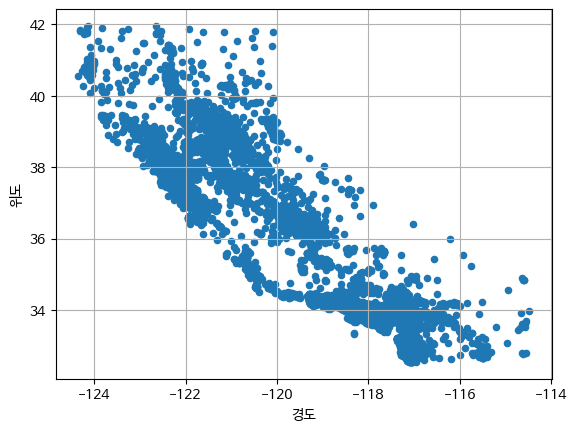

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)    # grid는 격자
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

alpha = 마커의 투명도로 0~1의 값

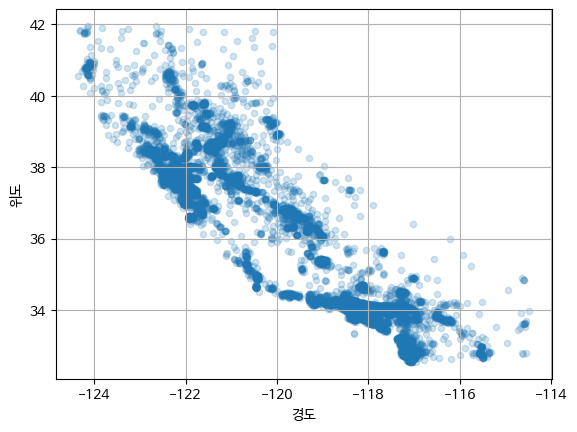

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

원의 반지름은 구역의 인구 (매개변수 s)
색상은 가격 (매개변수 c)
파란색부터 빨간색까지의 범위를 가지는 jet (매개변수 cmap)

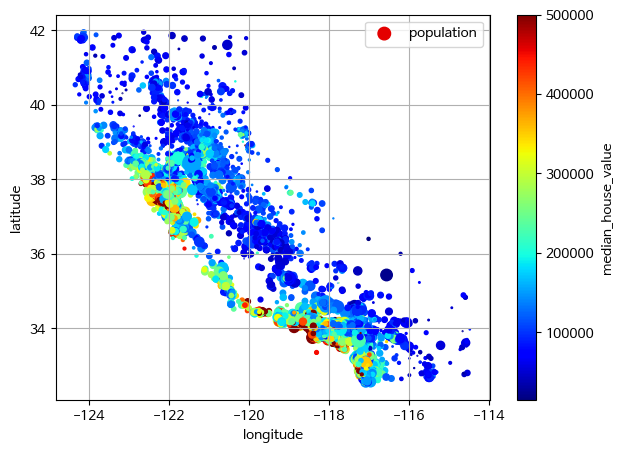

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(7,5))
plt.show()

# 2.4.2 상관관계 조사하기

데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수(피어슨의 r)를 corr() 메서드를 이용해 쉽게 계산할 수 있다.

In [27]:
corr_matrix = housing.corr(numeric_only=True)

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)  #ascending = 오름차순

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

상관관계의 범위는 -1부터 1까지이다. 1에 가까울수록 강한 양의 상관관계를 가진다. 예를 들어 중간 주택가격과 중간소득은 올라갈 때 증가한다. 또한 중간 주택가격과 위도는 음의 상관관계를 갖는데, 북쪽으로 갈수록 주택 가격이 내려간다.

특성 사이의 상관관계는 판다스의 scatter_matrix를 통해 특성 간 산점도를 그린다.

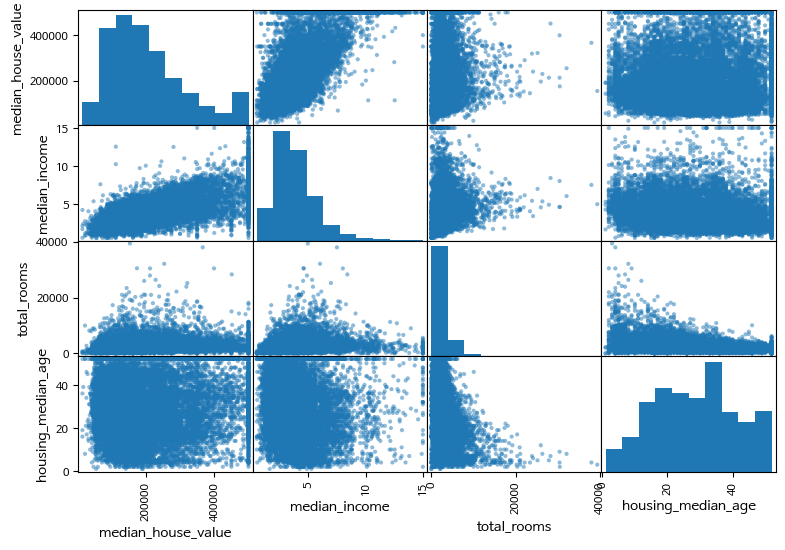

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(9,6))
plt.show()

산점도 행렬 중 유용해보이는 산점도를 사용한다.

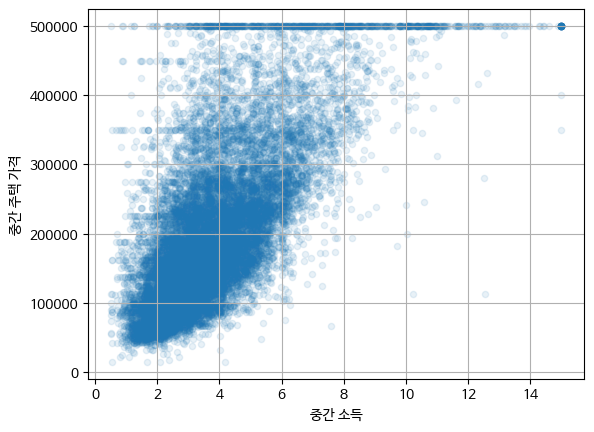

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

# 2.4.3 특성 조합으로 실험하기

지금까지 머신러닝 알고리즘에 주입하기 전에 정제해야 할 데이터를 확인했고, 특성 사이에 흥미로운 상관관계를 발견했다. 어떤 특성의 분포는 오른쪽 꼬리가 길어서 데이터를 변형하는 것이 좋을 수 있다. (로그 함수나 제곱근을 적용)

머신러닝 알고리즘용 데이터를 준비하기 전에 마지막으로 할 수 있는 일은 특성을 여러 가지로 조합해보는 것이다. 특정 구역의 방 개수는 가구 수를 모른다면 그다지 유용하지 않다. 여기서 가구당 방 개수를 사용하면 다르다.

비슷하게 전체 침실 개수도 그 자체로는 유용하지 않지만, 방 개수와 비교하는 것이 유용할 것이다.

In [31]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [32]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

bedrooms_ratio 특성은 전체 방 개수나 침실 개수보다 중간 주택 가격과의 상관관계가 훨씬 높다. 이는 침실/방의 비율이 낮은 집은 더 비싼 경향이 있다.

또, 가구당 방 개수도 구역 내 전체 방 개수보다 더 유용하다.

# 2.5 머신러닝 알고리즘을 위한 데이터 준비

원래 훈련 세트로 복원하고, 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리한다.

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# 2.5.1 데이터 정제

앞서 total_bedrooms 특성에 값이 없는 경우도 있었는데 이를 고칠 수 있는 방법은 3가지 있다.

1. 해당 구역을 제거한다.
2. 전체 특성을 삭제한다.
3. 누락된 값을 어떤 값으로 채운다. (0, 평균, 중간값 등), 이를 대체라고 한다.

```
housing.dropna(subset=["total_bedrooms"], inplace=True)     # 옵션 1

housing.drop("total_bedrooms", axis=1, inplace=True)        # 옵션 2

median = housing["total_bedrooms"].median()                 # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

옵션 3을 사용하되, 사이킷런에 있는 SimpleImputer 클래스를 사용한다.

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.select_dtypes(include=[np.number])

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

이제 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있다.

In [37]:
X = imputer.transform(housing_num)

X를 데이터프레임으로 감싸서 housing_num으로부터 열 이름과 인덱스를 복원한다.

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

# 2.5.2 텍스트와 범주형 특성 다루기

In [39]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


각 값은 카테고리를 나타내는 범주형 특성이다. 이 카테고리를 텍스트에서 숫자로 변환해야 한다.

In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이 표현 방식의 문제는  (bad, average, good ...)와 같이 순서가 있는 카테고리는 괜찮지만, 머신러닝 알고리즘이 가까이 있는 두 값을 떨아져 있는 두 값보다 더 비슷하게 생각한다는 점이다.

그렇기에 한 특성만 1이고(핫) 나머지는 0인 원-핫 인코딩을 한다.

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

기본적으로 OneHotEncoder의 출력은 넘파이 배열이 아니라 사이파이 희소 행렬이다. 사이파이 희소 행렬은 대부분이 0인 행렬을 매우 효율적으로 표현한다.

대부분 희소 행렬을 보통의 2D 배열처럼 사용할 수 있지만, 넘파이 배열로도 바꿀 수 있다.

In [43]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 2.5.3 특성 스케일과 변환

머신러닝 알고리즘은 입력된 숫자 특성들의 스케일이 많이 다르면 제대로 작동하지 않는다. 전체 방 개수의 범위는 6에서 39320인 반면, 중간 소득의 범위는 0에서 15까지이다. 스케일링을 적용하지 않으면 대부분의 모델은 중간 소득을 무시하고 방 개수에 더 초점을 맞출 것이다.

모든 특성의 범위를 같게 만들어주는 방법으로 min-max 스케일링(정규화)과 표준화가 널리 사용된다.

각 특성에 대해서 0~1 범위에 들도록 값을 이동하고 스케일을 조정한다. 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 이렇게 할 수 있다.

In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

표준화는 먼저 평균을 뺀 후 표준 편차로 나눈다. 그래서 정규화와 달리 표준화는 특정 범위로 값을 제한하지 않는다. 그러나 표준화는 이상치에 영향을 덜 받는다.

In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

멱법칙 분포

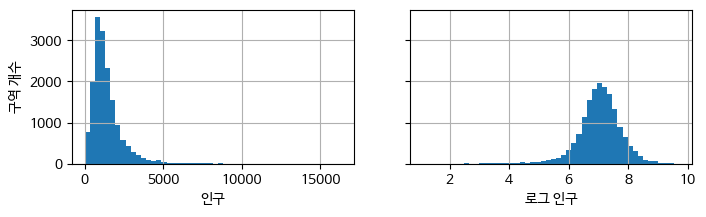

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("인구")
axs[1].set_xlabel("로그 인구")
axs[0].set_ylabel("구역 개수")
plt.show()

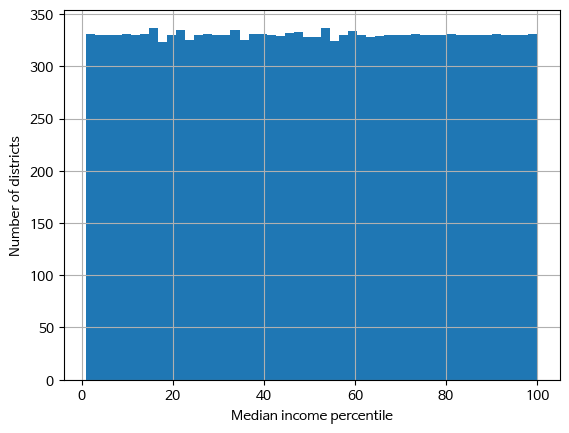

In [52]:
# 추가 코드 – 균등 분포를 얻는다는 것을 보여줍니다 (버킷타이징)
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: 1 백분위수 아래의 소득은 1로 레이블되고 99 백분위수 이상의 값은 100으로 레이블됩니다.
# 이 때문에 아래 분포의 범위가 1에서부터 100까지입니다(0에서부터 100까지가 아닙니다).

멀티모달 분포를 변환하는 방법으로 버킷타이징을 사용할 수도 있지만, 중간 주택 연도와 특정 모드 사이의 유사도를 나타내는 특성을 추가하는 것이다. 유사도 측정은 일반적으로 입력값과 고정 포인트 사이의 거리에만 의존하는 방사 기저 함수(RBF)를 사용한다.

가장 널리 사용되는 RBF는 입력값이 고정 포인트에서 멀어질수록 출력값이 지수적으로 감소하는 가우스 RBF이다. 예를 들어 주택 연도 X와 35 사이에 가우스 RBF 유사도는 exp(-γ(X-35)^2)과 같다.

In [53]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)   # γ = X가 35에서 멀어짐에 따라 유사도 값이 얼마나 빠르게 감소하는지 결정

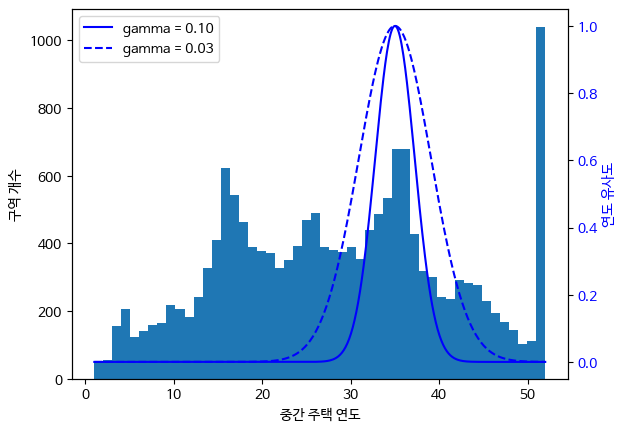

In [55]:
# 추가 코드 – 이 셀은 그림 2–18을 생성 합니다

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("중간 주택 연도")
ax1.set_ylabel("구역 개수")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("연도 유사도", color=color)

plt.legend(loc="upper left")
plt.show()

입력 특성뿐만 아니라 타깃값도 변환이 필요할 수 있다. 타깃 분포의 꼬리가 두껍다면 타깃을 로그값으로 바꿀 수 있다. 하지만 이렇게 하면 타깃의 로그를 예측하기 때문에 모델 예측에 지수 함수를 적용해야 한다.

In [56]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # 새로운 데이터라고 가정합니다

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)   # 원본 스케일로 되돌리기

In [57]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

TransformedTargetRegressor를 사용하여 더 간단하게 만들 수 있다.

In [58]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [59]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

# 2.5.4 사용자 정의 변환기

사용자 정의 변환, 정제 연산, 특성 결합과 같은 작업을 위해 자신만의 변환기를 작성할 필요가 있다.

특성 분포의 꼬리가 두꺼울 때(특성이 양수이고 두꺼운 꼬리가 오른쪽이라고 가정하면) 로그값으로 바꾸는 것이 좋은 경우가 종종 있다.

In [61]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

사용자 정의 변환 함수는 추가적인 인수로 하이퍼파라미터를 받을 수 있다. 예를 들어 가우스 RBF 유사돌르 계산하는 변환기를 다음과 같이 만들 수 있다.

In [62]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])